In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
dataset_path = r"C:\Users\muham\Documents\AIGS AI_ML\Garbage classification"

In [4]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation data
)

In [5]:

# Load train and validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2024 images belonging to 6 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 503 images belonging to 6 classes.


In [7]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.2424 - loss: 1.8595 - val_accuracy: 0.3917 - val_loss: 1.5069
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 573ms/step - accuracy: 0.4344 - loss: 1.3891 - val_accuracy: 0.3360 - val_loss: 1.6224
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 587ms/step - accuracy: 0.4579 - loss: 1.3536 - val_accuracy: 0.4354 - val_loss: 1.3836
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 587ms/step - accuracy: 0.4859 - loss: 1.3037 - val_accuracy: 0.4294 - val_loss: 1.4248
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 577ms/step - accuracy: 0.4980 - loss: 1.2558 - val_accuracy: 0.4453 - val_loss: 1.3919
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 565ms/step - accuracy: 0.5484 - loss: 1.1701 - val_accuracy: 0.4712 - val_loss: 1.3196
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 620ms/step - accuracy: 0.5845 - loss: 1.0641 - val_accuracy: 0.4911 - val_loss: 1.3006
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 644ms/step - accuracy: 0.5865 - loss: 1.0955 - val_accurac

Text(0.5, 1.0, 'Model Accuracy')

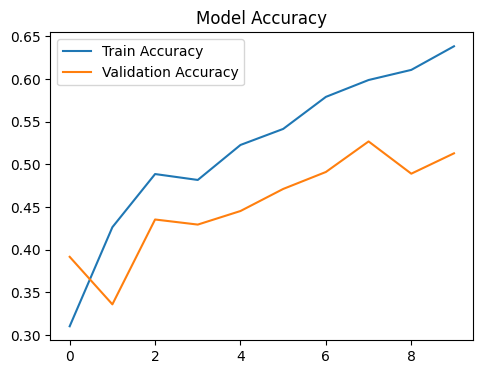

In [10]:
# Plot accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

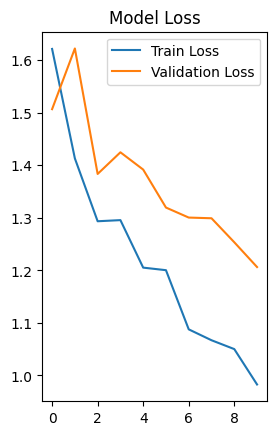

In [13]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()